## In this notebook, you will implement a two-layer neural network model and stochastic gradient descent with momentum in numpy to classify CIFAR-10 images.

In [ ]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# preprocess the data
x_train = x_train.reshape(x_train.shape[0], -1).astype('float')
x_test = x_test.reshape(x_test.shape[0], -1).astype('float')
y_train = y_train.squeeze()
y_test = y_test.squeeze()

x_train = x_train - x_train.mean(axis=1, keepdims=True)
x_train = x_train / x_train.std(axis=1, keepdims=True)
x_test = x_test - x_test.mean(axis=1, keepdims=True)
x_test = x_test / x_test.std(axis=1, keepdims=True)

170508288/170498071 [==============================] - 4s 0us/step


# Implement the forward and backward function for a two-layer neural network

In [ ]:
class FullyConnectedNet():
  def __init__(self, hidden_dim, input_dim=3072, num_classes=10):
    super(FullyConnectedNet, self).__init__()
    self.params = {}
    self.params['W1'] = np.random.randn(input_dim, hidden_dim)/np.sqrt(input_dim/2)
    self.params['b1'] = np.zeros(hidden_dim)
    self.params['W2'] = np.random.randn(hidden_dim, num_classes)/np.sqrt(hidden_dim/2)
    self.params['b2'] = np.zeros(num_classes)
    self.grads = {}
    self.grads['W1'] = np.zeros_like(self.params['W1'])
    self.grads['b1'] = np.zeros_like(self.params['b1'])
    self.grads['W2'] = np.zeros_like(self.params['W2'])
    self.grads['b2'] = np.zeros_like(self.params['b2'])
        
  def forward(self, x):
    """Forward pass: linear -- ReLU -- linear
    
    Arguments:
        x: 2D numpy array of shape (batch_size, input_dim)
        
    Returns:
        scores: 2D numpy array of shape (batch_size, num_classes)
        cache: a tuple of numpy arrays, used for backward pass
    """
    ############################Write your code in this block (20 points)#####################




    
    #################################End of your code#########################################
    return scores, cache
    
  def backward(self, dscores, cache):
    """Backward pass
    
    Arguments:
        dscores: 2D numpy array of shape (batch_size, num_classes)
        cache: a tuple of numpy arrays saved from forward pass
        
    Returns:
        no explicit variable returned
        update self.grads['W1'], self.grads['b1'], self.grads['W2'], self.grads['b2']
    """
    #############################Write your code in this block (30 points)######################




    
    ##################################End of your code##########################################
    return

In [ ]:
# The Cross Entropy Loss has been implemented for you
def cross_entropy_loss(scores, y, eps=1e-8):
  """Calculate cross entropy loss and its gradient with respect to scores
  
  Arguments:
      scores: 2D numpy array of shape (batch_size, num_classes), predicted class scores
      y: 1D numpy array of shape (batch_size,), true class labels (from 0 to num_classes-1)
      
  Returns:
      loss: scalar
      dscores: 2D numpy array of shape (batch_size, num_classes), loss's gradient with respect to scores
      
  """
  scores -= scores.max()
  exp = np.exp(scores)
  exp = np.maximum(exp, eps)
  logits = - scores[range(scores.shape[0]), y] + np.log(exp.sum(axis=1))
  loss = logits.mean()
  dscores = np.zeros_like(scores)
  dscores[range(scores.shape[0]), y] = -1
  dscores += exp/exp.sum(axis=1, keepdims=True)
  dscores /= scores.shape[0]
  return loss, dscores

# Implement SGD with momentum
Initialize $m^{(0)}=0$

After $k$ steps, update $m^{(k+1)}$ and $\theta^{(k+1)}$:
$$m^{(k+1)}=\beta \cdot m^{(k)} + \nabla_{\theta} $$
$$\theta^{(k+1)}=\theta^{(k)} - \alpha \cdot m^{(k+1)}$$
If you want to have a deep understanding of SGD with momentum, I recommend [this article](https://distill.pub/2017/momentum).

In [ ]:
class SGD():
  def __init__(self, params, alpha, beta=0):
    """
    Arguments:
      params: a dictionary, with keys being variable names, and values numpy arrays
      alpha: learning rate as shown in the formula in above text cell
      beta: the momentum coefficient, as shown in the formula in the above text cell;
        if beta = 0, then it becomes vallina SGD; Can you figure out why?
    """    
    self.params = params
    self.alpha = alpha
    self.beta = beta
    # Initially, set the momentum m = 0 for all parameters
    self.momentum = {n: np.zeros_like(p) for n, p in self.params.items()}

  def step(self, grads):
    """Perform gradient descent
    Arguments:
        grads: a dictionary, with the same keys as self.params, storing the corresponding gradients;
               for example, grads['W1'] is the gradient with respect to self.params['W1']
    Returns:
        No explicit returns
        Update self.params internally
    """
    #Hint: self.params is a dictionary of parameters,
    ###### use a for loop to iterate all the items from self.params,
    ###### use the formula in the above text cell to update each parameter;
    ###### Note self.momentum and grads are all dictionaries with the same keys as self.params
    ##############################Write your code in this block (20 points)######################



    
    ###################################End of your code##########################################
    return

# Test your implementation using the following code

In [ ]:
hidden_dim = 200
model = FullyConnectedNet(hidden_dim=hidden_dim)

In [ ]:
y_pred, _ = model.forward(x_train)
acc_train = np.mean(y_pred.argmax(axis=1) == y_train)
y_pred, _ = model.forward(x_test)
acc_test = np.mean(y_pred.argmax(axis=1) == y_test)
print(f'Before training, training accuracy={acc_train}, test accuracy={acc_test}')

Before training, training accuracy=0.07636, test accuracy=0.0786


In [ ]:
loss_history = []
acc_train_history = []
acc_val_history = []

In [ ]:
num_iters = 2000
batch_size = 500
alpha = 1e-2
beta = 0.9
optimizer = SGD(model.params, alpha=alpha, beta=beta)
print_every = num_iters//20
for i in range(num_iters):
    idx = np.random.choice(x_train.shape[0], batch_size)
    x_batch = x_train[idx]
    y_batch = y_train[idx]
    scores, cache = model.forward(x_batch)
    loss, dscores = cross_entropy_loss(scores, y_batch)
    model.backward(dscores, cache)
    optimizer.step(model.grads)
    loss_history.append(loss.item())
    acc_train = np.mean(scores.argmax(axis=1) == y_batch)
    acc_train_history.append(acc_train.item())
    # test accuracy
    idx = np.random.choice(x_test.shape[0], batch_size)
    x_batch = x_test[idx]
    y_batch = y_test[idx]
    scores, cache = model.forward(x_batch)
    acc_val = np.mean(scores.argmax(axis=1) == y_batch)
    acc_val_history.append(acc_val.item())
    if i == 0 or i == num_iters-1 or (i+1)%print_every == 0:
        print(f'{i+1} loss={loss}, acc_train={acc_train}, acc_val={acc_val}')

1 loss=3.3509998098698044, acc_train=0.058, acc_val=0.086
100 loss=1.7504365880336077, acc_train=0.424, acc_val=0.394
200 loss=1.7023970063133742, acc_train=0.402, acc_val=0.388
300 loss=1.7165458631906652, acc_train=0.412, acc_val=0.364
400 loss=1.5705675184781749, acc_train=0.436, acc_val=0.396
500 loss=1.6496755098973364, acc_train=0.432, acc_val=0.404
600 loss=1.660103960312628, acc_train=0.444, acc_val=0.42
700 loss=1.6393618655703845, acc_train=0.432, acc_val=0.396
800 loss=1.54584041718648, acc_train=0.454, acc_val=0.356
900 loss=1.6283353068488784, acc_train=0.406, acc_val=0.4
1000 loss=1.5913434415090146, acc_train=0.48, acc_val=0.432
1100 loss=1.621172169054676, acc_train=0.436, acc_val=0.422
1200 loss=1.5633865744300428, acc_train=0.48, acc_val=0.444
1300 loss=1.578248749933853, acc_train=0.42, acc_val=0.426
1400 loss=1.5492583232018824, acc_train=0.45, acc_val=0.392
1500 loss=1.6358196066121078, acc_train=0.448, acc_val=0.434
1600 loss=1.5507208581274685, acc_train=0.478, a

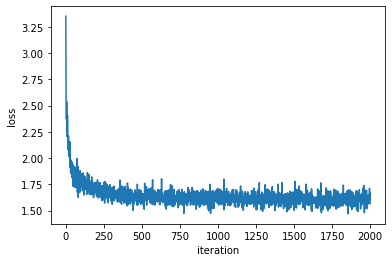

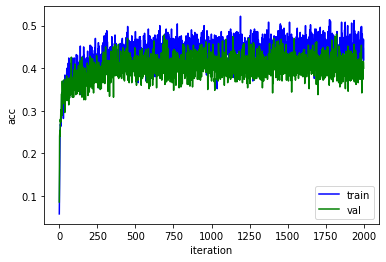

In [ ]:
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()
plt.plot(acc_train_history, 'b-', label='train')
plt.plot(acc_val_history, 'g-', label='val')
plt.xlabel('iteration')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
y_pred, _ = model.forward(x_train)
acc_train = np.mean(y_pred.argmax(axis=1) == y_train)
y_pred, _ = model.forward(x_test)
acc_test = np.mean(y_pred.argmax(axis=1) == y_test)
## You should achieve a test accuracy at least 0.4
print(f'After training, training accuracy={acc_train}, test accuracy={acc_test}')

After training, training accuracy=0.45026, test accuracy=0.4096


# Try different hyperparameters: hidden_dim, lr, batch_size, num_iters, find one that can achieve the best test accuracy

1 loss=3.47417037964835, acc_train=0.075, acc_val=0.1725
100 loss=1.995035432015747, acc_train=0.335, acc_val=0.33
200 loss=1.8615467584286847, acc_train=0.3825, acc_val=0.3025
300 loss=1.7528243950555522, acc_train=0.37, acc_val=0.3225
400 loss=1.8197735781927642, acc_train=0.35, acc_val=0.3625
500 loss=1.7226077931975856, acc_train=0.41, acc_val=0.355
600 loss=1.6835865114911743, acc_train=0.415, acc_val=0.335
700 loss=1.7798427495212195, acc_train=0.3775, acc_val=0.3375
800 loss=1.689815071341373, acc_train=0.4075, acc_val=0.3575
900 loss=1.6880398999455, acc_train=0.4, acc_val=0.4075
1000 loss=1.7914577971543069, acc_train=0.3675, acc_val=0.41
1100 loss=1.7342081439649166, acc_train=0.42, acc_val=0.42
1200 loss=1.6339491686969096, acc_train=0.435, acc_val=0.3975
1300 loss=1.6065376391449218, acc_train=0.44, acc_val=0.385
1400 loss=1.7036661524550702, acc_train=0.4175, acc_val=0.38
1500 loss=1.699153031330678, acc_train=0.4125, acc_val=0.3875
1600 loss=1.625065957993018, acc_train=0

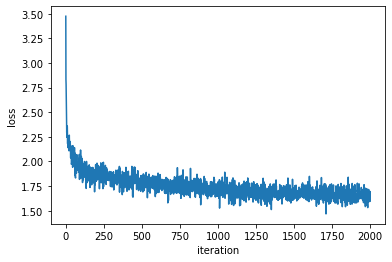

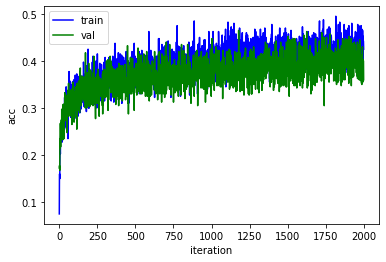

After training, training accuracy=0.42994, test accuracy=0.3947


In [ ]:
###############Modify these hyperparameters and find the best ones (20 points)##################
###############You can write a loop to search for the best parameters if your want##############
hidden_dim = 200
alpha = 1e-2
beta = 0
batch_size = 400
num_iters = 2000
#################################################################################################

model = FullyConnectedNet(hidden_dim=hidden_dim)
optimizer = SGD(model.params, alpha=alpha, beta=beta)
loss_history = []
acc_train_history = []
acc_val_history = []
print_every = num_iters//20
for i in range(num_iters):
    idx = np.random.choice(x_train.shape[0], batch_size)
    x_batch = x_train[idx]
    y_batch = y_train[idx]
    scores, cache = model.forward(x_batch)
    loss, dscores = cross_entropy_loss(scores, y_batch)
    model.backward(dscores, cache)
    optimizer.step(model.grads)
    loss_history.append(loss.item())
    acc_train = np.mean(scores.argmax(axis=1) == y_batch)
    acc_train_history.append(acc_train.item())
    # test accuracy
    idx = np.random.choice(x_test.shape[0], batch_size)
    x_batch = x_test[idx]
    y_batch = y_test[idx]
    scores, cache = model.forward(x_batch)
    acc_val = np.mean(scores.argmax(axis=1) == y_batch)
    acc_val_history.append(acc_val.item())
    if i == 0 or i == num_iters-1 or (i+1)%print_every == 0:
        print(f'{i+1} loss={loss}, acc_train={acc_train}, acc_val={acc_val}')
        
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()
plt.plot(acc_train_history, 'b-', label='train')
plt.plot(acc_val_history, 'g-', label='val')
plt.xlabel('iteration')
plt.ylabel('acc')
plt.legend()
plt.show()

y_pred, _ = model.forward(x_train)
acc_train = np.mean(y_pred.argmax(axis=1) == y_train)
y_pred, _ = model.forward(x_test)
acc_test = np.mean(y_pred.argmax(axis=1) == y_test)
## You should achieve a test accuracy at least 0.4
print(f'After training, training accuracy={acc_train}, test accuracy={acc_test}')